# Polarimetric Whitening Filter (PWF)

This notebook shows how to apply the PWF on the S matrix.

In [ ]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np
from pathlib import Path
import xarray as xr
from polsarpro.io import open_netcdf_beam
from polsarpro.speckle_filters import pwf

# optional import for progress bar
from dask.diagnostics import ProgressBar

# change to your data paths
# original dataset
input_alos_data = Path("/data/psp/test_files/SAN_FRANCISCO_ALOS1_slc.nc")

# output files from C
output_dir = Path("/data/psp/res/")

## Load ALOS data and C outputs

In [ ]:
S = open_netcdf_beam(input_alos_data)

## Apply the filter
**Important note:**  
this version differs from the C implementation since it allows to smooth the covariance matrix using the `test_window_size` prior to multiplying it with the inverse covariance estimated using the `train_window size` parameter. Using values `[1, 1]` for the test window is equivalent to the original C PolSARpro implementation.

In [ ]:
file_out = output_dir / "pwf.nc"
# netcdf writer cannot overwrite
if os.path.isfile(file_out):
    os.remove(file_out)

with ProgressBar():
    pwf(S, train_window_size=[15, 15], test_window_size=[3, 3]).to_netcdf(file_out)

[########################################] | 100% Completed | 52.22 s


## Open the output file

In [19]:
res = xr.open_dataset(file_out)

## Display the result

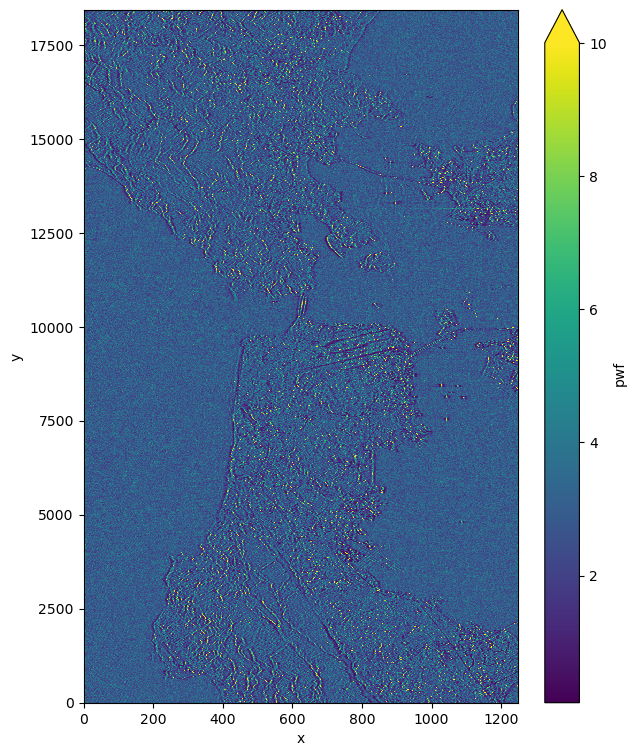

In [20]:
# clip the intensity to handle the high dynamic range
res.pwf.plot.imshow(figsize=(7,9), vmax=10)